In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Mesenchymal/")

In [3]:
## read data
adata = sc.read_h5ad("Mesenchymal.bySample.n10.bbknn_umap_leiden_marker.res0.3.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

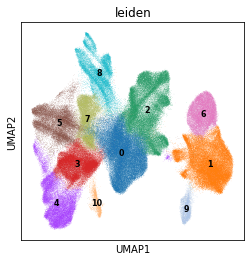

In [4]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

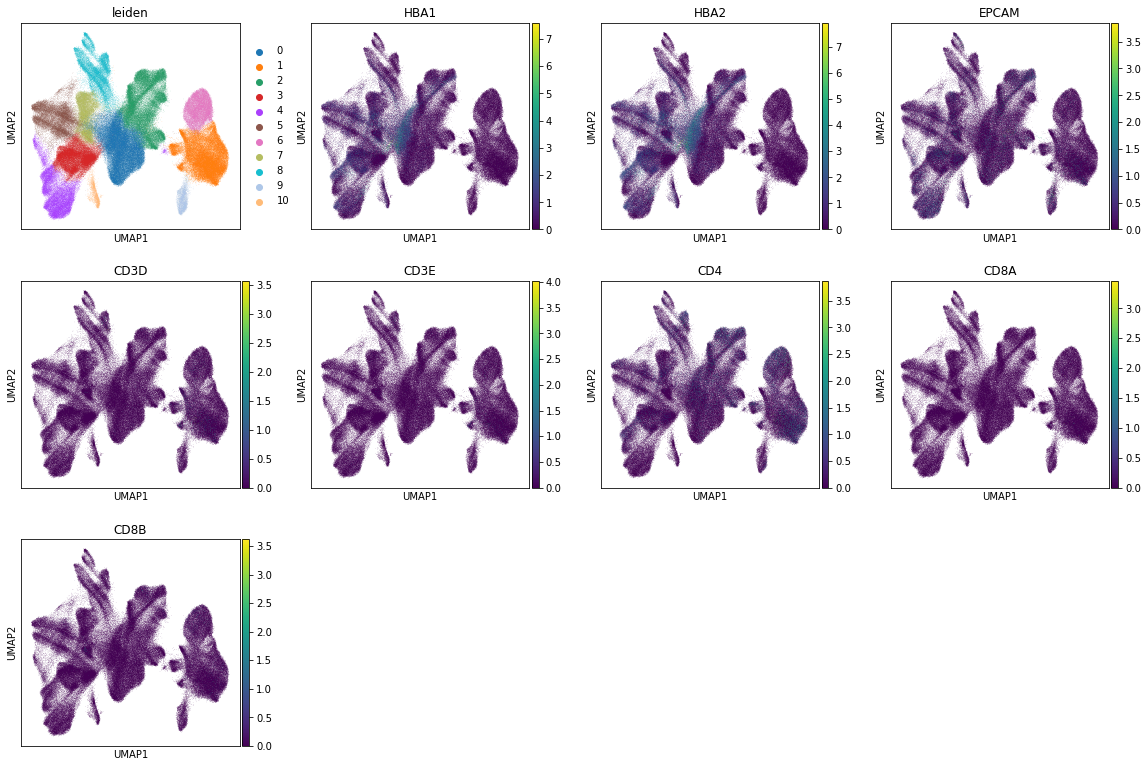

In [5]:
## plot gene expression in umap
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden',"HBA1","HBA2","EPCAM", "CD3D","CD3E","CD4","CD8A","CD8B"])

In [6]:
cells = adata.obs.index.to_list()

In [7]:
tmp = sc.read_h5ad("../ibd_20220111.raw.h5ad")
adata = tmp[tmp.obs.index.isin(cells)]

In [8]:
HBA1 = adata[:,"HBA1"].X.toarray()
HBA2 = adata[:,"HBA2"].X.toarray()
HBB = adata[:,"HBB"].X.toarray()
EPCAM = adata[:,"EPCAM"].X.toarray()
CD4 = adata[:,"CD4"].X.toarray()

In [9]:
total = np.array(adata.X.sum(axis=1))
HBA1_exp = np.log2( HBA1*10000/total + 1)
HBA2_exp = np.log2( HBA2*10000/total + 1)
HBB_exp = np.log2( HBB*10000/total + 1)
HB_exp = (HBA1_exp + HBA2_exp  + HBB_exp)/3

EPCAM_exp = np.log2( EPCAM*10000/total + 1)
CD4_exp = np.log2( CD4*10000/total + 1)

Text(0.5, 1.0, 'HB_exp')

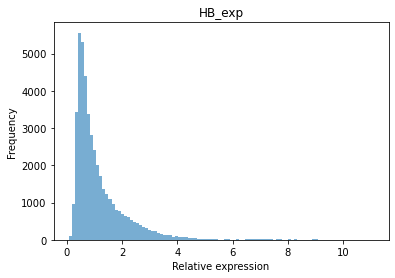

In [10]:
fig,ax=plt.subplots()
data = HB_exp[HB_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="HB_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("HB_exp")

Text(0.5, 1.0, 'EPCAM_exp')

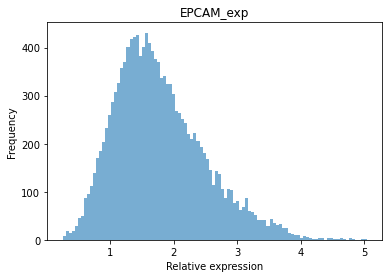

In [11]:
fig,ax=plt.subplots()
data = EPCAM_exp[EPCAM_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="EPCAM_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("EPCAM_exp")

Text(0.5, 1.0, 'CD4_exp')

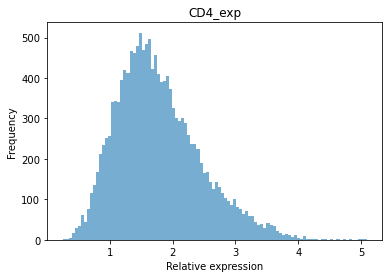

In [12]:
fig,ax=plt.subplots()
data = CD4_exp[CD4_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="CD4_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("CD4_exp")

In [13]:
adata

View of AnnData object with n_obs × n_vars = 255168 × 16105
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [14]:
select = np.logical_and(EPCAM_exp < 0.1, HB_exp < 0.1)
select = np.logical_and(select, CD4_exp < 0.1)
adata = adata[select]

In [15]:
adata

View of AnnData object with n_obs × n_vars = 187495 × 16105
    obs: 'sampleName', 'study', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_rp', 'pct_counts_rp', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'rp', 'exclude', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [16]:
adata.write_h5ad("Mesenchymal.bySample.n10.filtered.h5ad")

In [17]:
## done